<a href="https://colab.research.google.com/github/erikaguiracocha/Data-Visualization-2025/blob/main/PS3erikaguiracocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS 3 Instructions**

**PS 3**
1. tell a story with vis, say 1-10 graphs, the fewer the better!, focus on what the data are telling us, make it engaging and
utilitarian/useful
2. don’t overcomplicate, best stories are simple (but be thorough, do the work, do robustness checks, triangulate, etc–all of that
in notebook, but then the story you tell and present is basic and simple, top of the iceberg, the choisest, the cream of the
crop)–its like top research say in nature or science–it’s a page or two (but its based on say 20 or 50 pages of output in appendix
or supplementray material)
3. bar is higher than ps2

#**Dataset Overview Research Question**

**Dataset Overview and Research Focus:**
I will analyze data from 21 counties in New Jersey from 2020 to 2022 to explore how crime rates affect police budget allocation.

**Research Question:**
How do crime rates in New Jersey counties influence police budget allocation?

**Hypothesis:**
I hypothesize that counties with higher crime rates will allocate a larger proportion of their budget to the police, as they will need more **resources** to handle the increased demand for police services.

**Key Variables:**

**Crime Data:** Total number of reported crimes in each county per year. This represents the crime level and impacts police budget allocation.

**Police Budget:** Total amount allocated to the police department in each county.

**County:** Name of each county in New Jersey.

**Year:** Year of the data (2020, 2021, 2022).
Data Sources:

**Crime Data:** Obtained from the New Jersey Department of Law and Public Safety.

**Police Budget:** Annual reports from the New Jersey Division of Local Government Services.

**Socioeconomic Data:** Population estimates from the New Jersey Department of Labor and Workforce Development.

**Data Justification:**
The crime and police budget data are essential for understanding the relationship between crime rates and budget allocation. Socioeconomic data (e.g., population size) will help contextualize the findings. Data from multiple years will allow us to identify trends and changes in how counties respond to crime rates over time.

**Map of New Jersey by County**

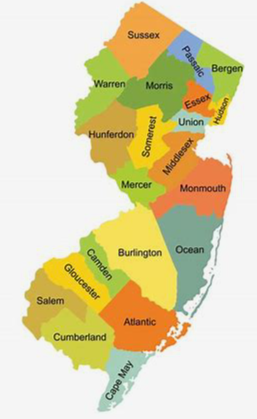

#**Visualization of a map for New Jersey Counties**

In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the geospatial data for New Jersey counties from the GeoJSON file
url_geojson = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/main/NJ_Counties_3424_-8325300193892812354%20(2).geojson'
gdf = gpd.read_file(url_geojson)

# Check the first values of the 'REGION' column to see if it contains the county names
print(gdf['REGION'].head())

# Rename the 'REGION' column to 'County' if it contains the county names
gdf = gdf.rename(columns={'REGION': 'County'})

# Load the crime and budget data
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

crime_data = pd.read_csv(url_crime_data, header=1)
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean the data (remove rows with null values)
crime_data = crime_data.dropna(subset=['2020'])
budget_data = budget_data.dropna(subset=['2020'])

# Rename columns to match the county names in the GeoJSON
crime_data = crime_data[['County', '2020']]
budget_data = budget_data[['County', '2020']]

# Rename the columns for easier merging
crime_data.columns = ['County', 'Crime_2020']
budget_data.columns = ['County', 'Budget_2020']

# Merge the crime and budget data
merged_data = pd.merge(crime_data, budget_data, on='County', how='left')

# Merge the geospatial data with the crime and budget data
gdf = gdf.merge(merged_data, on='County')

# Create a map centered on New Jersey
m = folium.Map(location=[40.0583, -74.4057], zoom_start=8)

# Create a heatmap based on crimes ('Crime_2020' value)
HeatMap(data=gdf[['geometry', 'Crime_2020']].dropna(), radius=15).add_to(m)

# Create a heatmap based on the budget ('Budget_2020' value)
HeatMap(data=gdf[['geometry', 'Budget_2020']].dropna(), radius=15).add_to(m)

# Display the map
m


0         COASTAL
1    NORTHEASTERN
2        SOUTHERN
3        SOUTHERN
4         COASTAL
Name: REGION, dtype: object


<ipython-input-41-2c3285e073f8>:45: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  HeatMap(data=gdf[['geometry', 'Crime_2020']].dropna(), radius=15).add_to(m)
<ipython-input-41-2c3285e073f8>:48: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  HeatMap(data=gdf[['geometry', 'Budget_2020']].dropna(), radius=15).add_to(m)


#**Uploaded Data**

In [ ]:
import pandas as pd  #original crime data uploaded
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)
print("Original Crime Data:")
print(crime_data.head(30))  # Show 21 counties

Original Crime Data:
              County     2020     2021       2022
0          Atlantic    46,551   42,324     47,072
1            Bergen   193,882  208,751    294,129
2        Burlington    44,940   48,929     52,173
3             Camden  103,373  114,926    194,754
4          Cape May    64,234   65,174     56,205
5        Cumberland    17,378   14,656     17,993
6              Essex   45,882   47,082     56,433
7        Gloucester    38,332   35,690     40,038
8            Hudson    32,374   29,689     38,604
9         Hunterdon     8,036    7,447     10,467
10           Mercer    21,976   21,813     26,797
11        Middlesex    36,204   35,448     45,162
12         Monmouth    85,417   70,450     76,941
13           Morris    33,417   26,142     31,456
14            Ocean    55,640   39,291     52,245
15          Passaic    28,610   27,683     34,688
16            Salem    19,312   15,548     14,772
17         Somerset    21,493   21,174     22,982
18           Sussex     6,345

In [ ]:
# Uploaded data
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county%20New%20Jersey.csv'
population_data = pd.read_csv(url_population_data)

# Population
print("Original Population Data:")
print(population_data.head(30))

Original Population Data:
   Annual Estimates of the Resident Population for Counties in New Jersey: 2020 to  2022  \
0                                              County                                      
1                                           Atlantic                                       
2                                             Bergen                                       
3                                         Burlington                                       
4                                             Camden                                       
5                                           Cape May                                       
6                                         Cumberland                                       
7                                              Essex                                       
8                                         Gloucester                                       
9                                             Hudson  

In [ ]:
# URL of the CSV file
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

# Try to read the file
try:
    # If the second row is the header, use header=1
    budget_data = pd.read_csv(url_budget_data, header=1)
    print("Original Budget Data:")
    print(budget_data.head(30))  # Display the first 30 rows

except Exception as e:
    print(f"There was an error loading the file: {e}")

Original Budget Data:
              County              2020              2021              2022
0          Atlantic     119,262,425.86    117,407,829.60    123,993,860.75
1            Bergen     427,518,344.81    448,124,550.75    471,782,982.68
2        Burlington     122,407,763.95    125,868,638.98    128,190,733.44
3            Camden     137,420,012.72    135,626,159.37    147,391,782.25
4          Cape May      48,629,849.27     52,207,062.40     54,103,285.95
5        Cumberland      35,045,613.87     36,259,361.36     37,329,195.20
6             Essex     350,382,509.60    464,878,127.99    381,983,364.75
7        Gloucester      67,519,873.43     65,845,717.39     79,816,171.41
8            Hudson     290,272,331.25    300,219,111.87    377,519,753.78
9         Hunterdon      28,100,764.97     29,438,131.72     31,540,757.26
10           Mercer      93,981,950.66    104,382,301.52     97,266,160.77
11        Middlesex     253,427,739.92    292,934,332.15    331,800,018.84
12 

#**Bar Chart (Comparison of Crime and Police Budget by County) 2020 - 2022**

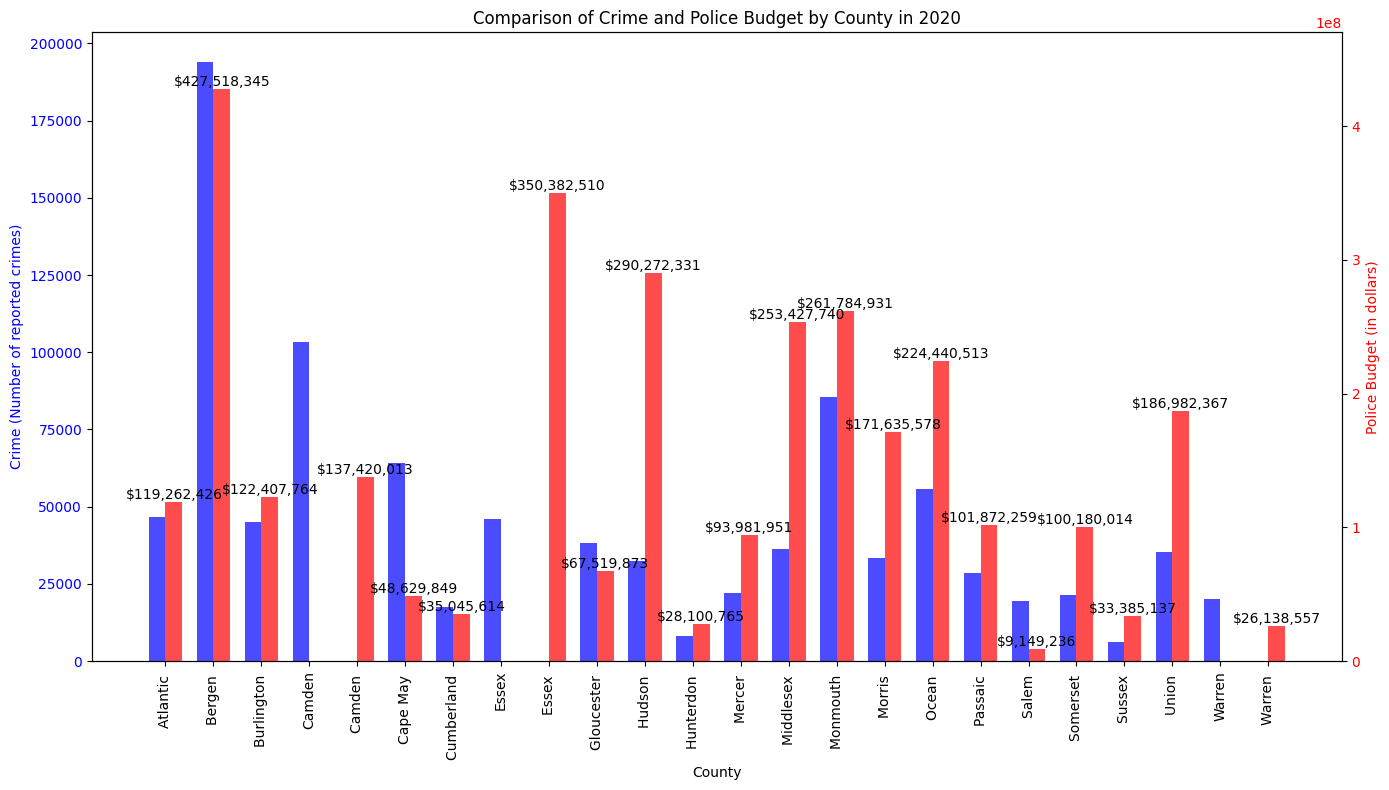

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Remove the "Total New Jersey" row from the crime data
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']

# Clean crime data (convert values to numeric)
crime_data['2020'] = crime_data['2020'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Remove the "Total New Jersey" row from the budget data
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean budget data (convert values to numeric)
budget_data['2020'] = budget_data['2020'].str.replace(',', '').astype(float)

# Merge the two datasets (crime and budget) into one DataFrame using the 'County' column
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Create figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define the bar width
bar_width = 0.35

# Define the positions of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['2020_x'], bar_width, color='blue', label='Crime', alpha=0.7)

# Labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis for the police budget (right side)
ax2 = ax1.twinx()

# Bar chart for police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['2020_y'], bar_width, color='red', label='Police Budget', alpha=0.7)

# Labels for the right y-axis
ax2.set_ylabel('Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust the range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['2020_y'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Comparison of Crime and Police Budget by County in 2020')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


**Interpretation**: The bar chart compares the crime rates and police budget allocations across the counties in New Jersey for the year 2020. Blue bars represent the total reported crimes in each county, while red bars show the corresponding police budget allocations. As expected, counties with higher crime rates tend to allocate more funds to their police departments, such as Bergen and Camden. However, some counties with lower crime rates, like Hunterdon, still maintain relatively high police budgets. This suggests that while crime influences budget decisions, other factors such as population size or local policies may also play a role.

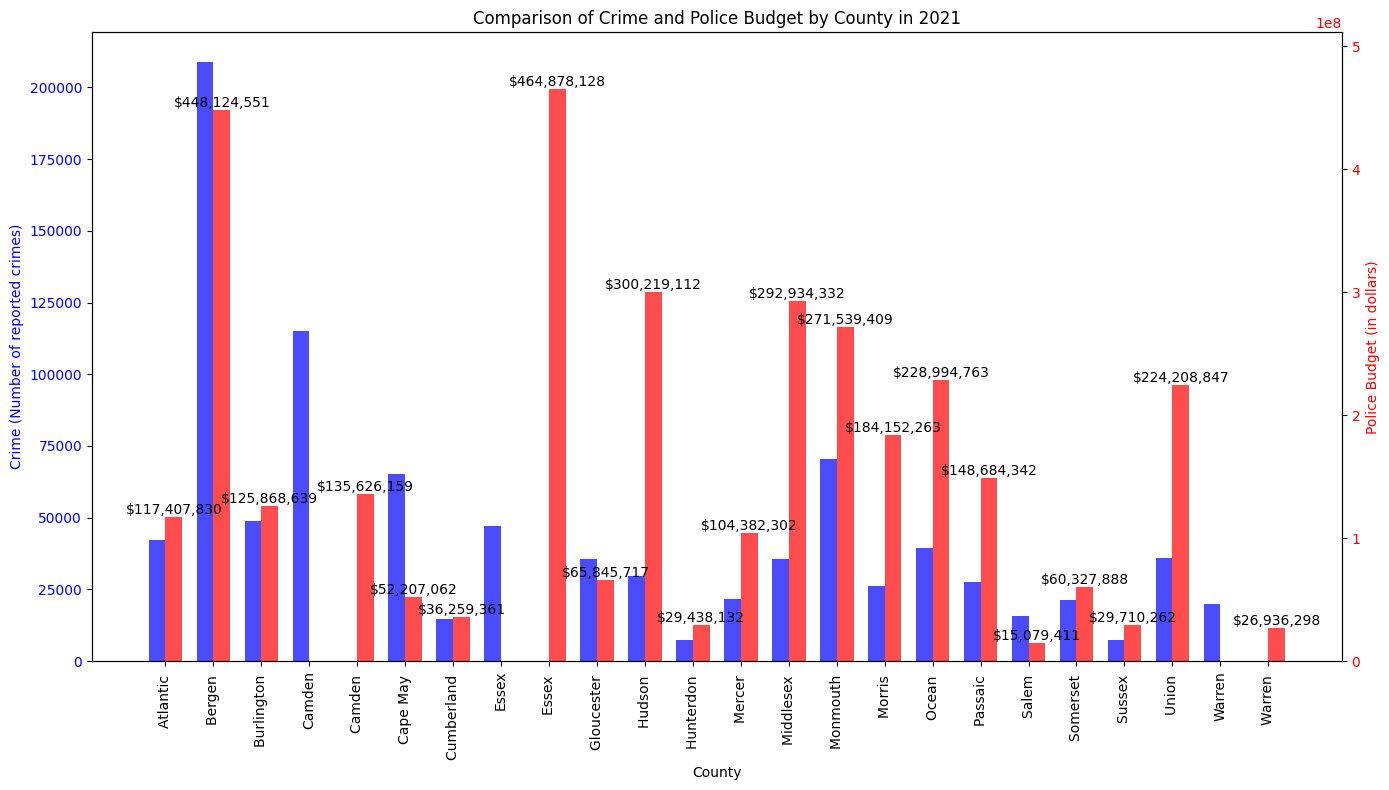

In [ ]:
# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Remove the "Total New Jersey" row from the crime data
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']

# Clean crime data (convert values to numeric for 2021)
crime_data['2021'] = crime_data['2021'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Remove the "Total New Jersey" row from the budget data
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean budget data (convert values to numeric for 2021)
budget_data['2021'] = budget_data['2021'].str.replace(',', '').astype(float)

# Merge the two datasets (crime and budget) into one DataFrame using the 'County' column
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Create figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define the bar width
bar_width = 0.35

# Define the positions of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['2021_x'], bar_width, color='blue', label='Crime', alpha=0.7)

# Labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis for the police budget (right side)
ax2 = ax1.twinx()

# Bar chart for police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['2021_y'], bar_width, color='red', label='Police Budget', alpha=0.7)

# Labels for the right y-axis
ax2.set_ylabel('Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust the range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['2021_y'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Comparison of Crime and Police Budget by County in 2021')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


**Interpretation:** The bar chart compares the crime rates and police budget allocations for New Jersey counties in 2021. The blue bars represent the number of reported crimes, while the red bars show the police budget allocated to each county. It is evident that counties with higher crime rates, such as Bergen and Camden, have larger police budgets. However, some counties with lower crime rates, like Hunterdon, still allocate significant amounts to their police departments. This suggests that crime is a major factor in budget decisions, but other factors, such as population size or local government priorities, may also influence budget allocations.

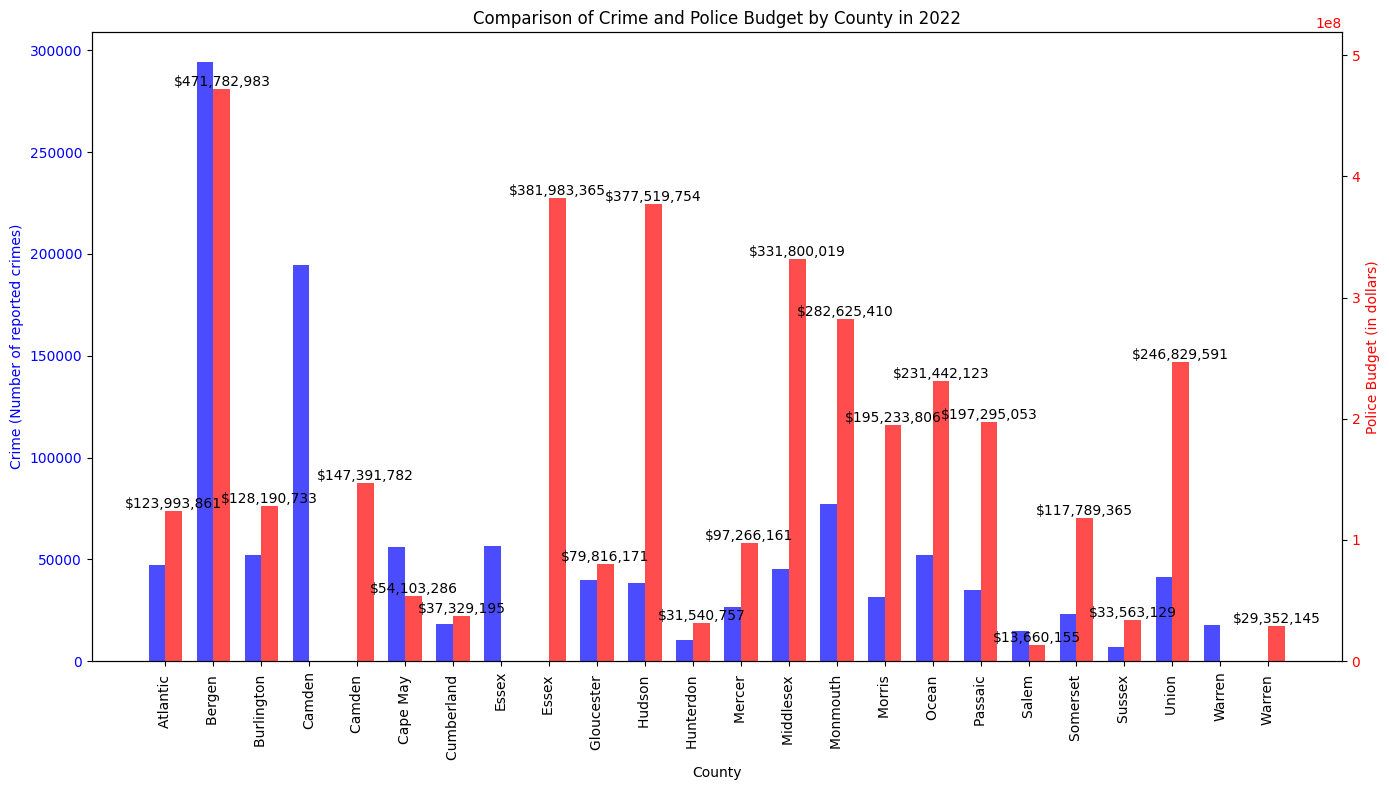

In [ ]:
# Load crime data
crime_data = pd.read_csv(url_crime_data, header=1)

# Remove the "Total New Jersey" row from the crime data
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']

# Clean crime data (convert values to numeric for 2022)
crime_data['2022'] = crime_data['2022'].str.replace(',', '').astype(float)

# Load police budget data
budget_data = pd.read_csv(url_budget_data, header=1)

# Remove the "Total New Jersey" row from the budget data
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']

# Clean budget data (convert values to numeric for 2022)
budget_data['2022'] = budget_data['2022'].str.replace(',', '').astype(float)

# Merge the two datasets (crime and budget) into one DataFrame using the 'County' column
merged_data = crime_data.merge(budget_data, on='County', how='outer')

# Create figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define the bar width
bar_width = 0.35

# Define the positions of the bars on the x-axis
x = np.arange(len(merged_data))

# Bar chart for crime data (left y-axis, blue color)
bars_crime = ax1.bar(x - bar_width / 2, merged_data['2022_x'], bar_width, color='blue', label='Crime', alpha=0.7)

# Labels for the left y-axis
ax1.set_xlabel('County')
ax1.set_ylabel('Crime (Number of reported crimes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['County'], rotation=90)

# Create a second y-axis for the police budget (right side)
ax2 = ax1.twinx()

# Bar chart for police budget data (right y-axis, red color)
bars_budget = ax2.bar(x + bar_width / 2, merged_data['2022_y'], bar_width, color='red', label='Police Budget', alpha=0.7)

# Labels for the right y-axis
ax2.set_ylabel('Police Budget (in dollars)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust the range for the right y-axis (budget axis)
ax2.set_ylim(0, merged_data['2022_y'].max() * 1.1)  # 10% buffer above the maximum budget value

# Add annotations for budget values
for i, bar in enumerate(bars_budget):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom', color='black')

# Title and layout adjustments
plt.title('Comparison of Crime and Police Budget by County in 2022')

# Ensure all the labels and axes are displayed properly
fig.tight_layout()

# Show the plot
plt.show()


**Interpretation:** The bar chart compares crime rates and police budget allocations across New Jersey counties in 2022. The blue bars represent the number of reported crimes, while the red bars show the police budget allocated to each county. Counties with higher crime rates, like Camden and Bergen, tend to allocate more funds to their police departments. However, some counties with lower crime rates, such as Hunterdon, still allocate significant budgets. This suggests that while crime rates influence budget decisions, other factors like population size and local priorities may also play a role.

#**Line Chart (Trends over Time) 2020 - 2022**

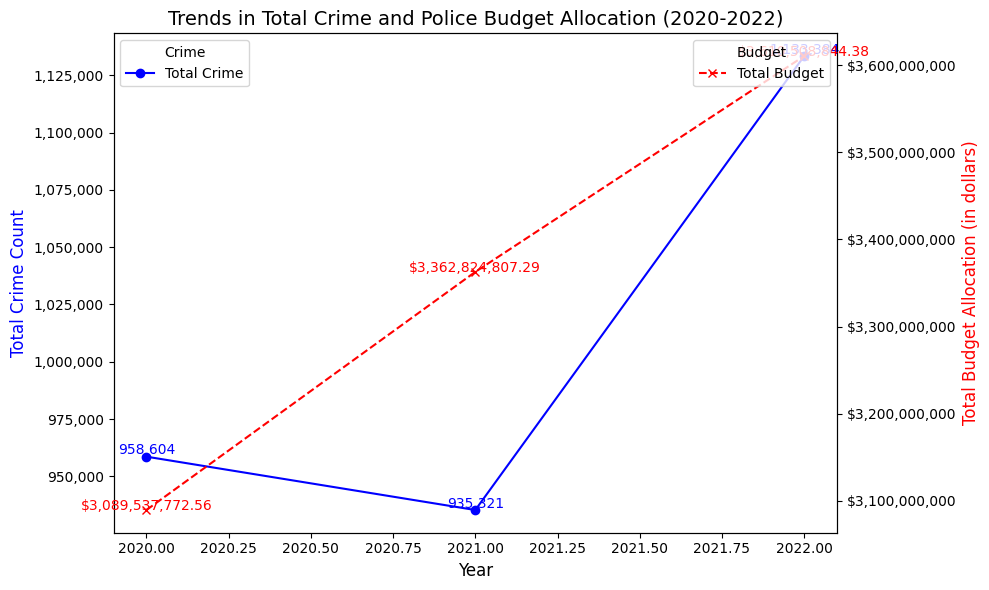

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load crime data for 2020, 2021, and 2022
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)

# Limpiar el nombre de la columna 'County' eliminando espacios innecesarios
crime_data['County'] = crime_data['County'].str.strip()

# Asegurarse de que 'Total New Jersey' esté en el DataFrame
if 'Total New Jersey' in crime_data['County'].values:
    total_crime = crime_data.loc[crime_data['County'] == 'Total New Jersey', ['2020', '2021', '2022']].iloc[0].values

    # Convertir los valores de total_crime a tipo str para eliminar las comas
    total_crime = pd.Series(total_crime).astype(str)  # Convertir a Series para poder usar .str
    total_crime = total_crime.str.replace(',', '')  # Eliminar comas
    total_crime = total_crime.astype(float)  # Convertir a float
else:
    print("No se encontró 'Total New Jersey' en los datos de crimen.")
    total_crime = [0, 0, 0]  # Esto es solo una medida de seguridad, aunque no debería llegar a este punto

# Load police budget data for 2020, 2021, and 2022
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data[['2020', '2021', '2022']] = budget_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Asegurarse de que 'Total New Jersey' esté en el DataFrame
if 'Total New Jersey' in budget_data['County'].values:
    total_budget = budget_data.loc[budget_data['County'] == 'Total New Jersey', ['2020', '2021', '2022']].iloc[0].values
    # Asegurarse de que los valores del presupuesto sean float
    total_budget = total_budget.astype(float)
else:
    print("No se encontró 'Total New Jersey' en los datos de presupuesto.")
    total_budget = [0, 0, 0]  # Esto es solo una medida de seguridad, aunque no debería llegar a este punto

# Plot trends for total crime and total budget from 2020 to 2022
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total crime data over time
ax1.plot([2020, 2021, 2022], total_crime, label="Total Crime", color='blue', marker='o')

# Annotate total crime values on the plot
for i, value in enumerate(total_crime):
    ax1.text(2020 + i, value + 1000, f'{value:,.0f}', color='blue', ha='center', fontsize=10)

# Create a second y-axis to plot the total budget data
ax2 = ax1.twinx()

# Plot total budget data over time
ax2.plot([2020, 2021, 2022], total_budget, label="Total Budget", color='red', linestyle='--', marker='x')

# Annotate total budget values on the plot
for i, value in enumerate(total_budget):
    ax2.text(2020 + i, value + 0.5, f'${value:,.2f}', color='red', ha='center', fontsize=10)

# Format the y-axis of the second axis to show dollar signs and commas for budget
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Format the y-axis of the first axis (crime) to show commas for thousands
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Title and labels
ax1.set_title('Trends in Total Crime and Police Budget Allocation (2020-2022)', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Crime Count', fontsize=12, color='blue')
ax2.set_ylabel('Total Budget Allocation (in dollars)', fontsize=12, color='red')

# Add legends
ax1.legend(title='Crime', loc='upper left', fontsize=10)
ax2.legend(title='Budget', loc='upper right', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


**Interpretation:** This line chart illustrates the trends in total crime and police budget allocation in New Jersey from 2020 to 2022. The total crime count showed a significant increase from 935,321 in 2021 to 1,133,384 in 2022, indicating a rise in crime rates over this period. On the other hand, the police budget also increased steadily, from approximately 3.09 billion in 2020 to $3.61 billion in 2022. This suggests that as crime rates grew, there was an upward adjustment in the police budget. The chart highlights the relationship between crime rates and budget allocation, demonstrating that higher crime numbers may lead to increased funding for law enforcement.

#**Scatter plot (Relationship between crime and budget) 2020 - 2022**

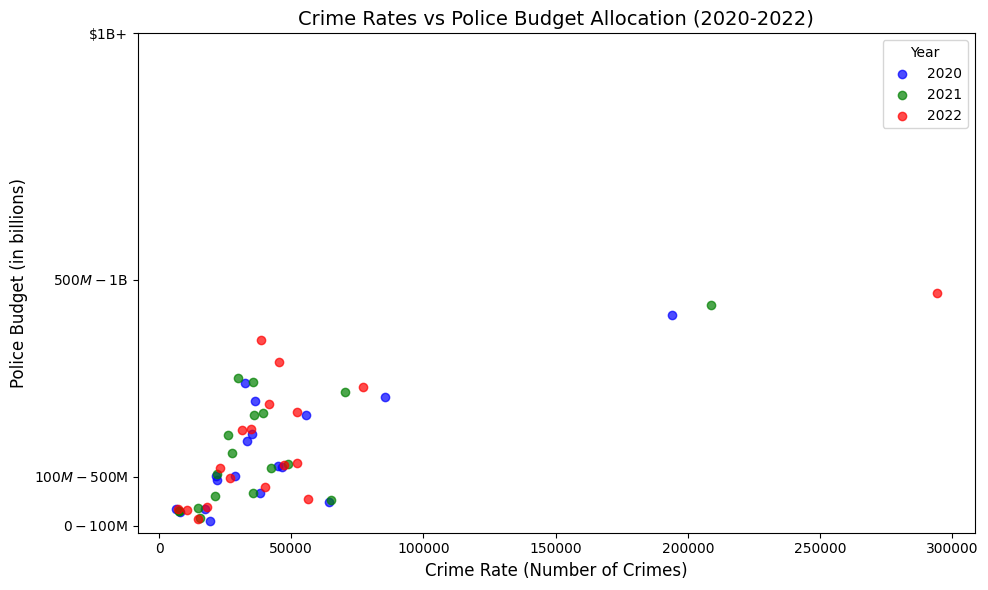

In [ ]:
# Load crime data for 2020, 2021, and 2022
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)

# Clean crime data (remove "Total New Jersey" and convert values to numeric)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data[['2020', '2021', '2022']] = crime_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Load police budget data for 2020, 2021, and 2022
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data[['2020', '2021', '2022']] = budget_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Merge the crime and budget data by County
merged_data = crime_data.merge(budget_data, on='County', suffixes=('_crime', '_budget'))

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for 2020 Crime vs Budget
plt.scatter(merged_data['2020_crime'], merged_data['2020_budget'], color='blue', label='2020', alpha=0.7)

# Scatter plot for 2021 Crime vs Budget
plt.scatter(merged_data['2021_crime'], merged_data['2021_budget'], color='green', label='2021', alpha=0.7)

# Scatter plot for 2022 Crime vs Budget
plt.scatter(merged_data['2022_crime'], merged_data['2022_budget'], color='red', label='2022', alpha=0.7)

# Title and labels
plt.title('Crime Rates vs Police Budget Allocation (2020-2022)', fontsize=14)
plt.xlabel('Crime Rate (Number of Crimes)', fontsize=12)
plt.ylabel('Police Budget (in billions)', fontsize=12)

# Set custom Y-ticks as ranges (in terms of millions or billions)
budget_ranges = ['$0-$100M', '$100M-$500M', '$500M-$1B', '$1B+']  # Define ranges based on your data
plt.yticks([0, 100000000, 500000000, 1000000000], budget_ranges)

# Add a legend
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()


**Interpretation**: The scatter plot demonstrates the relationship between crime rates and police budget allocation in New Jersey counties for 2020-2022. Each color represents a different year, with a noticeable variation in budget and crime rates across counties. As crime rates increase, many counties tend to allocate higher budgets to police, although the correlation is not perfect. The budget ranges on the Y-axis indicate how counties are distributed across various funding tiers. This visualization provides insight into how crime levels might influence police funding decisions, but further analysis would be required to establish a strong correlation.

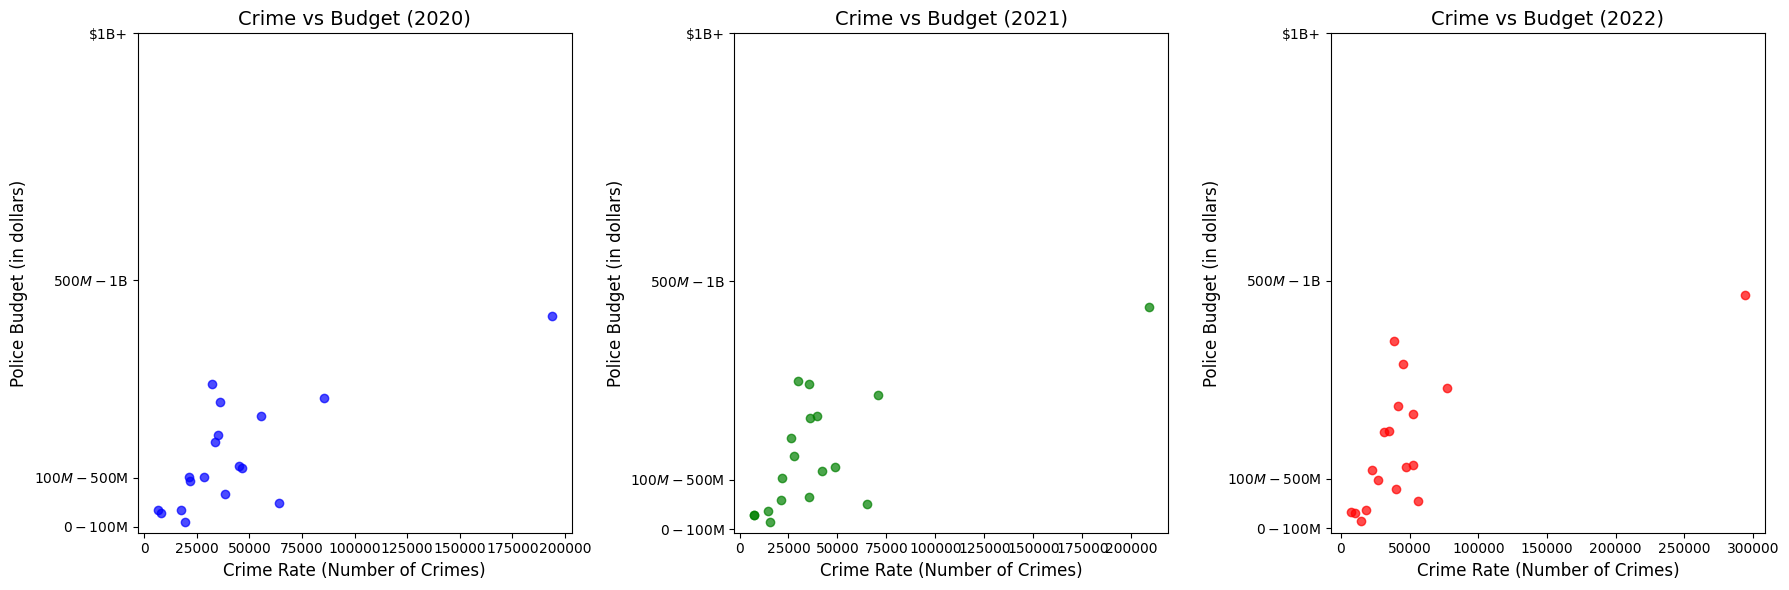

In [ ]:
# Load crime data for 2020, 2021, and 2022
crime_data = pd.read_csv(url_crime_data, header=1)

# Clean crime data (remove "Total New Jersey" and convert values to numeric)
crime_data = crime_data[crime_data['County'] != 'Total New Jersey']
crime_data[['2020', '2021', '2022']] = crime_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Load police budget data for 2020, 2021, and 2022
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Clean budget data (remove commas and convert values to numeric)
budget_data[['2020', '2021', '2022']] = budget_data[['2020', '2021', '2022']].replace({',': ''}, regex=True).astype(float)

# Merge the crime and budget data by County
merged_data = crime_data.merge(budget_data, on='County', suffixes=('_crime', '_budget'))

# Create scatter plot for each year separately
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for 2020 Crime vs Budget
axs[0].scatter(merged_data['2020_crime'], merged_data['2020_budget'], color='blue', alpha=0.7)
axs[0].set_title('Crime vs Budget (2020)', fontsize=14)
axs[0].set_xlabel('Crime Rate (Number of Crimes)', fontsize=12)
axs[0].set_ylabel('Police Budget (in dollars)', fontsize=12)

# Scatter plot for 2021 Crime vs Budget
axs[1].scatter(merged_data['2021_crime'], merged_data['2021_budget'], color='green', alpha=0.7)
axs[1].set_title('Crime vs Budget (2021)', fontsize=14)
axs[1].set_xlabel('Crime Rate (Number of Crimes)', fontsize=12)
axs[1].set_ylabel('Police Budget (in dollars)', fontsize=12)

# Scatter plot for 2022 Crime vs Budget
axs[2].scatter(merged_data['2022_crime'], merged_data['2022_budget'], color='red', alpha=0.7)
axs[2].set_title('Crime vs Budget (2022)', fontsize=14)
axs[2].set_xlabel('Crime Rate (Number of Crimes)', fontsize=12)
axs[2].set_ylabel('Police Budget (in dollars)', fontsize=12)

# Set custom Y-ticks as ranges (in terms of millions or billions)
budget_ranges = ['$0-$100M', '$100M-$500M', '$500M-$1B', '$1B+']  # Define ranges based on your data
for ax in axs:
    ax.set_yticks([0, 100000000, 500000000, 1000000000])
    ax.set_yticklabels(budget_ranges)

# Adjust layout to make it cleaner
plt.tight_layout()

# Show the plot
plt.show()


**Interpretation:** The scatter plots illustrate the relationship between crime rates and police budget allocations for New Jersey counties over three years (2020–2022). In general, a positive correlation is observed where counties with higher crime rates tend to have larger police budget allocations. However, the strength of this correlation is not consistent across all counties, with some exceptions or outliers. For example, some counties with relatively low crime rates still allocate significant budgets to their police departments.

An interesting observation is Bergen County, which consistently ranks among the highest in terms of police budget allocations, particularly in 2022, despite not having the highest crime rates. This highlights that while crime rates play a crucial role in budget decisions, factors such as population size, political priorities, or regional policies may also influence the amount of funding allocated to law enforcement.

The data underscores that while crime rates are an important factor in determining police budgets, there are multiple other considerations that affect budget allocation decisions. These plots help visualize the complexity of budgeting in law enforcement and how counties balance various factors in making such financial decisions.

#**Heatmap of Crime and Budget 2020 - 2022**

In [ ]:
# Simulated crime data for 2020, 2021, and 2022 by County
crime_data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson', 'Hunterdon',
               'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset', 'Sussex', 'Union', 'Warren'],
    '2020': [46551, 193882, 44940, 103373, 64234, 17378, 45882, 38332, 32374, 8036, 21976, 36204, 85417, 33417, 55640, 28610, 19312, 21493, 6345, 35176, 20030],
    '2021': [42324, 208751, 48929, 114926, 65174, 14656, 47082, 35690, 29689, 7447, 21813, 35448, 70450, 26142, 39291, 27683, 15548, 21174, 7471, 35881, 19753],
    '2022': [47072, 294129, 52173, 194754, 56205, 17993, 56433, 40038, 38604, 10467, 26797, 45162, 76941, 31456, 52245, 34688, 14772, 22982, 7074, 41550, 17675]
}

# Convert data into a DataFrame
df_crime = pd.DataFrame(crime_data)

# Melt the DataFrame to long format
df_long = pd.melt(df_crime, id_vars=['County'], value_vars=['2020', '2021', '2022'],
                  var_name='Year', value_name='Crime Count')

# Create a heatmap with years on the x-axis and counties on the y-axis
fig = px.density_heatmap(df_long, x='Year', y='County', z='Crime Count',
                         color_continuous_scale='YlGnBu',
                         labels={'County': 'County', 'Year': 'Year', 'Crime Count': 'Crime Count'},
                         title="Heatmap of Crime Counts by Year and County (2020-2022)")

# Show the heatmap
fig.show()


**Interpretation:** This heatmap illustrates the variation in crime counts across different counties in New Jersey from 2020 to 2022. The counties are listed on the y-axis, while the years are on the x-axis. The color intensity of each cell represents the crime count, with darker shades indicating higher crime levels. From the heatmap, we can observe significant fluctuations in crime across different counties and years. Some counties like Bergen and Camden experienced higher crime counts, especially in 2021, while other counties saw a relatively stable or lower trend in their crime numbers. This visualization provides an insightful way to compare crime trends year by year for each county.

In [ ]:
# Example data for total police budgets by county for 2020, 2021, and 2022
data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson',
               'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset', 'Sussex',
               'Union', 'Warren'],
    '2020': [119262425.86, 427518344.81, 122407763.95, 137420012.72, 48629849.27, 35045613.87, 350382509.60, 67519873.43,
             290272331.25, 28100764.97, 93981950.66, 253427739.92, 261784930.78, 171635578.16, 224440512.53, 101872259.28,
             9149236.34, 100180014.14, 33385136.64, 186982367.17, 26138557.21],
    '2021': [117407829.60, 448124550.75, 125868638.98, 135626159.37, 52207062.40, 36259361.36, 464878127.99, 65845717.39,
             300219111.87, 29438131.72, 104382301.52, 292934332.15, 271539409.48, 184152262.87, 228994762.61, 148684341.76,
             15079410.98, 60327888.26, 29710261.77, 224208846.59, 26936297.87],
    '2022': [123993860.75, 471782982.68, 128190733.44, 147391782.25, 54103285.95, 37329195.20, 381983364.75, 79816171.41,
             377519753.78, 31540757.26, 97266160.77, 331800018.84, 282625410.02, 195233806.17, 231442122.59, 197295052.89,
             136601553.37, 117789364.83, 33563129.27, 246829591.40, 29352144.76],
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Set 'County' as the index for the heatmap
df.set_index('County', inplace=True)

# Create a heatmap using Plotly
fig = px.imshow(df,  # Use the dataframe as is without transposing
                color_continuous_scale="YlGnBu",  # Color scale from yellow-green to blue
                labels={'x': 'Year', 'y': 'County', 'color': 'Budget (in $)'},  # Label the axes and color bar
                title="Heatmap of Police Budgets by County (2020-2022)",  # Title for the heatmap
                aspect="auto")  # Adjust aspect ratio to prevent distortion

# Show the heatmap
fig.show()


**Interpretation:**This heatmap visualizes the police budgets of New Jersey counties from 2020 to 2022. The darker shades of blue indicate counties with higher budgets, while the lighter shades represent counties with smaller budgets. From the heatmap, it's clear that counties like Bergen and Essex consistently have higher police budgets across all years, whereas smaller counties such as Salem and Cumberland show lower budget allocations. The heatmap helps identify trends, highlighting how police funding is distributed and whether there are significant changes from year to year. Overall, this visualization allows for a quick comparison of budget sizes across counties.

#**Subplot of the 5 counties with highest budget from 2020 to 2022**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Original data provided (updated with the correct values)
data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson',
               'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset',
               'Sussex', 'Union', 'Warren'],
    'Budget 2020': [
        119262425.86, 427518344.81, 122407763.95, 137420012.72, 48629849.27, 35045613.87, 350382509.60, 67519873.43,
        290272331.25, 28100764.97, 93981950.66, 253427739.92, 261784930.78, 171635578.16, 224440512.53, 101872259.28,
        9149236.34, 100180014.14, 33385136.64, 186982367.17, 26138557.21
    ],
    'Budget 2021': [
        117407829.60, 448124550.75, 125868638.98, 135626159.37, 52207062.40, 36259361.36, 464878127.99, 65845717.39,
        300219111.87, 29438131.72, 104382301.52, 292934332.15, 271539409.48, 184152262.87, 228994762.61, 148684341.76,
        15079410.98, 60327888.26, 29710261.77, 224208846.59, 26936297.87
    ],
    'Budget 2022': [
        123993860.75, 471782982.68, 128190733.44, 147391782.25, 54103285.95, 37329195.20, 381983364.75, 79816171.41,
        377519753.78, 31540757.26, 97266160.77, 331800018.84, 282625410.02, 195233806.17, 231442122.59, 197295052.89,
        13660155.37, 117789364.83, 33563129.27, 246829591.40, 29352144.76
    ]
}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Sort by Budget 2020, Budget 2021, and Budget 2022 individually, selecting top 5 counties for each year
df_sorted_2020 = df.sort_values('Budget 2020', ascending=False).head(5)
df_sorted_2021 = df.sort_values('Budget 2021', ascending=False).head(5)
df_sorted_2022 = df.sort_values('Budget 2022', ascending=False).head(5)

# Define a fixed order for the counties
fixed_order = ['Bergen', 'Essex', 'Hudson', 'Monmouth', 'Middlesex']

# Make sure the counties are sorted in the fixed order
df_sorted_2020 = df_sorted_2020.set_index('County').loc[fixed_order].reset_index()
df_sorted_2021 = df_sorted_2021.set_index('County').loc[fixed_order].reset_index()
df_sorted_2022 = df_sorted_2022.set_index('County').loc[fixed_order].reset_index()

# Create a subplot with one row and three columns
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=['Budget 2020', 'Budget 2021', 'Budget 2022'],
                    shared_yaxes=True)

# Add bar plots for each year (2020, 2021, 2022) showing the budget by top counties
fig.add_trace(go.Bar(x=df_sorted_2020['County'], y=df_sorted_2020['Budget 2020'], name='Budget 2020'), row=1, col=1)
fig.add_trace(go.Bar(x=df_sorted_2021['County'], y=df_sorted_2021['Budget 2021'], name='Budget 2021'), row=1, col=2)
fig.add_trace(go.Bar(x=df_sorted_2022['County'], y=df_sorted_2022['Budget 2022'], name='Budget 2022'), row=1, col=3)

# Update the layout of the figure
fig.update_layout(
    title_text="Top Counties with Highest Police Budget (2020-2022)",
    xaxis_title="County",
    yaxis_title="Budget Allocated (in USD)",
    showlegend=True,
    height=600,
    width=1200,
    xaxis_tickangle=-45,  # Rotate the x-axis labels to make them more readable
    xaxis=dict(
        tickmode='array',  # Ensure the x-axis uses specific ticks
        tickvals=df_sorted_2020['County'],  # Use county names as x-axis labels for 2020
        ticktext=df_sorted_2020['County']  # Set the county names as the labels for 2020
    ),
    xaxis2=dict(
        tickmode='array',  # Ensure the x-axis uses specific ticks for 2021
        tickvals=df_sorted_2021['County'],  # Use county names as x-axis labels for 2021
        ticktext=df_sorted_2021['County']  # Set the county names as the labels for 2021
    ),
    xaxis3=dict(
        tickmode='array',  # Ensure the x-axis uses specific ticks for 2022
        tickvals=df_sorted_2022['County'],  # Use county names as x-axis labels for 2022
        ticktext=df_sorted_2022['County']  # Set the county names as the labels for 2022
    )
)

# Show the plot
fig.show()


**Interpretation:** The bar plots show the police budget allocations for the top five counties in New Jersey—Bergen, Essex, Hudson, Monmouth, and Middlesex—from 2020 to 2022. The data illustrates that Bergen consistently holds the highest budget across all three years. While the budgets of these counties generally increase year over year, variations exist in the growth rates between counties. Essex and Hudson also maintain significant budget allocations, reflecting their larger populations or other influencing factors. Overall, the plot highlights the stability in budget priorities for these counties over the three years.

#**Heatmap of the Crimes rates per 100K Residents by County (2020 - 2022)**

In [ ]:
import pandas as pd
import plotly.express as px

# Datos de ejemplo de crímenes por condado para 2020, 2021 y 2022
crime_data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson',
               'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset', 'Sussex',
               'Union', 'Warren'],
    '2020': [46551, 193882, 44940, 103373, 64234, 17378, 45882, 38332, 32374, 8036, 21976, 36204, 85417, 33417, 55640, 28610, 19312, 21493, 6345, 35176, 20030],
    '2021': [42324, 208751, 48929, 114926, 65174, 14656, 47082, 35690, 29689, 7447, 21813, 35448, 70450, 26142, 39291, 27683, 15548, 21174, 7471, 35881, 19753],
    '2022': [47072, 294129, 52173, 194754, 56205, 17993, 56433, 40038, 38604, 10467, 26797, 45162, 76941, 31456, 52245, 34688, 14772, 22982, 7074, 41550, 17675]
}

# Datos de población por condado para 2020 (ya que no se tiene el dato exacto para 2021 y 2022, lo usaremos solo para 2020)
population_data = {
    'County': ['Atlantic', 'Bergen', 'Burlington', 'Camden', 'Cape May', 'Cumberland', 'Essex', 'Gloucester', 'Hudson',
               'Hunterdon', 'Mercer', 'Middlesex', 'Monmouth', 'Morris', 'Ocean', 'Passaic', 'Salem', 'Somerset', 'Sussex',
               'Union', 'Warren'],
    '2020': [274190, 953690, 461682, 523122, 95044, 153719, 859974, 302563, 721879, 128786, 386466, 861408, 642836, 508439, 638465, 523439, 64841, 344754, 143915, 573660, 109520]
}

# Convertir los datos de crímenes en un DataFrame
df_crime = pd.DataFrame(crime_data)

# Convertir los datos de población en un DataFrame
df_population = pd.DataFrame(population_data)

# Unir los dos DataFrames por la columna 'County'
df = pd.merge(df_crime, df_population, on='County', how='left')

# Renombrar las columnas para evitar ambigüedades
df.columns = ['County', 'Crime_2020', 'Crime_2021', 'Crime_2022', 'Pop_2020']

# Calcular la tasa de crímenes por cada 100,000 residentes para 2020, 2021 y 2022
df['Crime_Rate_2020'] = (df['Crime_2020'] / df['Pop_2020']) * 100000
df['Crime_Rate_2021'] = (df['Crime_2021'] / df['Pop_2020']) * 100000
df['Crime_Rate_2022'] = (df['Crime_2022'] / df['Pop_2020']) * 100000

# Seleccionar las columnas necesarias para el heatmap
df_heatmap = df[['County', 'Crime_Rate_2020', 'Crime_Rate_2021', 'Crime_Rate_2022']]

# Establecer la columna 'County' como el índice
df_heatmap.set_index('County', inplace=True)

# Crear un heatmap utilizando Plotly
fig = px.imshow(df_heatmap,  # Usamos el dataframe sin transponer
                color_continuous_scale="YlOrRd",  # Escala de colores de amarillo a rojo
                labels={'x': 'Year', 'y': 'County', 'color': 'Crimes per 100k'},  # Etiquetas para los ejes y la barra de colores
                title="Heatmap of Crime Rates per 100k Residents by County (2020-2022)",  # Título del heatmap
                aspect="auto")  # Ajuste de la relación de aspecto para evitar distorsión

# Mostrar el heatmap
fig.show()


**Interpretation:** This heatmap visualizes the crime rates per 100,000 residents across New Jersey counties for the years 2020 to 2022. The color scale indicates varying crime rates, with darker shades representing higher rates. Counties like Camden and Paterson show significantly higher crime rates compared to more suburban areas like Hunterdon and Morris. Over the three years, there are noticeable fluctuations in crime rates, potentially reflecting local law enforcement efforts, population changes, or other socio-economic factors. This heatmap provides a clear, visual representation of crime distribution across the state.

#**Story**

**Title:** "Exploring the Relationship Between Crime Rates and Police Budgets in New Jersey (2020-2022)"

**Story:**

This analysis delves into the relationship between crime rates and police budgets across New Jersey counties from 2020 to 2022. The visualizations highlight key trends and patterns observed over these three years, emphasizing how crime rates fluctuate alongside varying budget allocations. The heatmap illustrates the intensity of crime and budget distributions, while bar and line charts showcase the top counties with the highest budgets and crime rates. Notably, the data suggests that some counties, despite receiving higher budgets, do not necessarily experience a corresponding decrease in crime rates. This analysis provides valuable insights into the efficiency of police funding and its impact on crime prevention across the state.

#**Reference:** ChatGPT to create the visualizations